In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline
import matplotlib.patches as patches

In [2]:
def analytic_solution(A,B,omega,t):
    
    return [A*np.sin(omega*t)+B*np.cos(omega*t),omega*A*np.cos(omega*t)-omega*B*np.sin(omega*t)]

In [3]:
def Forward_Euler_approximation(q_initial,p_initial,delta,omega,num_iteration):
    
    initial_condition = np.array([q_initial,p_initial])
    evolution_map = np.array([[1,delta/4.0],[0,1]])@np.array([[1,0],[-(delta/2.0)*omega**2,1]])@np.array([[1,delta/4.0],[0,1]])
    output = np.dot(np.linalg.matrix_power(evolution_map, num_iteration), initial_condition)
    
    return output

ana_area_start: 6.283185307179586
ana_area_end: 6.283185307179586
ana_difference:0.0
eul_area_start: 6.283185307179586
eul_area_end: 6.2831853071796075
eul_difference:-2.1316282072803006e-14
ana_area_start: 6.283185307179586
ana_area_end: 6.283185307179586
ana_difference:0.0
eul_area_start: 6.283185307179586
eul_area_end: 6.283185307179476
eul_difference:1.1013412404281553e-13
ana_area_start: 6.283185307179586
ana_area_end: 6.283185307179586
ana_difference:0.0
eul_area_start: 6.283185307179586
eul_area_end: 6.283185307180386
eul_difference:-7.993605777301127e-13
ana_area_start: 6.283185307179586
ana_area_end: 6.283185307179586
ana_difference:0.0
eul_area_start: 6.283185307179586
eul_area_end: 6.283185307178904
eul_difference:6.821210263296962e-13


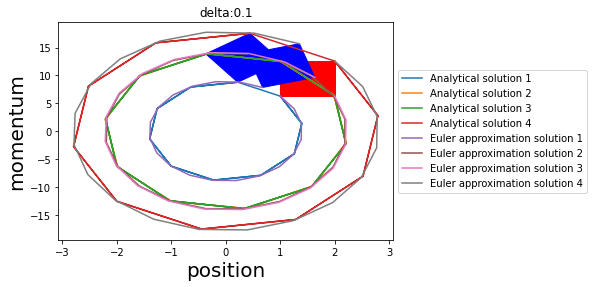

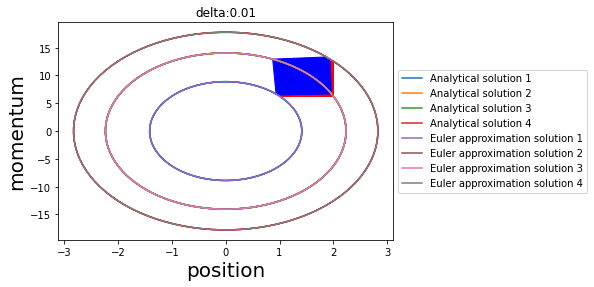

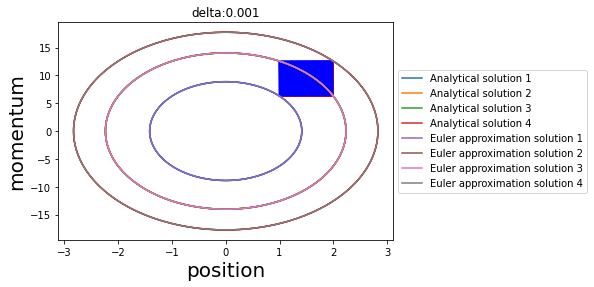

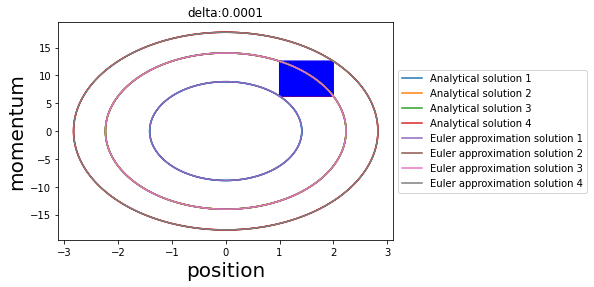

In [4]:
for delta in [0.1,0.01,0.001,0.0001]:
    
    end_time = 2
    n_end = int((end_time/delta))
    tt = np.arange(0.0, end_time, delta)
    ana_sol_1 = np.asarray([analytic_solution(1.0,1.0,2.0*np.pi,t) for t in np.arange(0.0, end_time, delta)])
    euler_approx_1 = np.asarray([Forward_Euler_approximation(ana_sol_1[0][0],ana_sol_1[0][1],delta,2.0*np.pi,n) for n in range(0,n_end,1) ])
    
    ana_sol_2 = np.asarray([analytic_solution(2.0,1.0,2.0*np.pi,t) for t in np.arange(0.0, end_time, delta)])
    euler_approx_2 = np.asarray([Forward_Euler_approximation(ana_sol_2[0][0],ana_sol_2[0][1],delta,2.0*np.pi,n) for n in range(0,n_end,1) ])
    
    ana_sol_3 = np.asarray([analytic_solution(1.0,2.0,2.0*np.pi,t) for t in np.arange(0.0, end_time, delta)])
    euler_approx_3 = np.asarray([Forward_Euler_approximation(ana_sol_3[0][0],ana_sol_3[0][1],delta,2.0*np.pi,n) for n in range(0,n_end,1) ])
    
    ana_sol_4 = np.asarray([analytic_solution(2.0,2.0,2.0*np.pi,t) for t in np.arange(0.0, end_time, delta)])
    euler_approx_4 = np.asarray([Forward_Euler_approximation(ana_sol_4[0][0],ana_sol_4[0][1],delta,2.0*np.pi,n) for n in range(0,n_end,1) ])
    
    
    #plotting out
    fig, axes = plt.subplots(1,1)

    axes.plot(ana_sol_1[:,0] ,ana_sol_1[:,1],label='Analytical solution 1')
    axes.plot(ana_sol_2[:,0] ,ana_sol_2[:,1],label='Analytical solution 2')
    axes.plot(ana_sol_3[:,0] ,ana_sol_3[:,1],label='Analytical solution 3')
    axes.plot(ana_sol_4[:,0] ,ana_sol_4[:,1],label='Analytical solution 4')
    
    # Define the vertices of the quadrilateral for analytical solution
    ana_vertices_start = [(ana_sol_1[0][0], ana_sol_1[0][1]), (ana_sol_2[0][0], ana_sol_2[0][1]),(ana_sol_4[0][0], ana_sol_4[0][1]),(ana_sol_3[0][0], ana_sol_3[0][1])]
    ana_vertices_end = [(ana_sol_1[-1][0], ana_sol_1[-1][1]), (ana_sol_2[-1][0], ana_sol_2[-1][1]),(ana_sol_4[-1][0], ana_sol_4[-1][1]),(ana_sol_3[-1][0], ana_sol_3[-1][1])]
    eul_vertices_start = [(euler_approx_1[0][0], euler_approx_1[0][1]), (euler_approx_2[0][0], euler_approx_2[0][1]),(euler_approx_4[0][0], euler_approx_4[0][1]),(euler_approx_3[0][0], euler_approx_3[0][1])]
    eul_vertices_end = [(euler_approx_1[-1][0], euler_approx_1[-1][1]), (euler_approx_2[-1][0], euler_approx_2[-1][1]),(euler_approx_4[-1][0], euler_approx_4[-1][1]),(euler_approx_3[-1][0], euler_approx_3[-1][1])]

    
    # Create a Polygon patch object
    ana_quad_start = patches.Polygon(ana_vertices_start, linewidth=1, edgecolor='r', facecolor='r')
    ana_quad_end = patches.Polygon(ana_vertices_end, linewidth=1, edgecolor='b', facecolor='b')
    eul_quad_start = patches.Polygon(eul_vertices_start, linewidth=1, edgecolor='r', facecolor='r')
    eul_quad_end = patches.Polygon(eul_vertices_end, linewidth=1, edgecolor='b', facecolor='b')

    # Define the coordinates of the vertices of a polygon
    ana_vertices_start = np.asarray(ana_vertices_start)
    ana_vertices_end = np.asarray(ana_vertices_end)
    eul_vertices_start = np.asarray(eul_vertices_start)
    eul_vertices_end = np.asarray(eul_vertices_end)
    
    # Use the shoelace formula to calculate the area of the polygon
    ana_area_start = 0.5 * np.abs(np.dot(ana_vertices_start[:,0], np.roll(ana_vertices_start[:,1], 1)) - np.dot(ana_vertices_start[:,1], np.roll(ana_vertices_start[:,0], 1)))
    ana_area_end = 0.5 * np.abs(np.dot(ana_vertices_end[:,0], np.roll(ana_vertices_end[:,1], 1)) - np.dot(ana_vertices_end[:,1], np.roll(ana_vertices_end[:,0], 1)))
    print(f"ana_area_start: {ana_area_start}")
    print(f"ana_area_end: {ana_area_end}")
    print(f"ana_difference:{ana_area_start-ana_area_end}" )
    
    eul_area_start = 0.5 * np.abs(np.dot(eul_vertices_start[:,0], np.roll(eul_vertices_start[:,1], 1)) - np.dot(eul_vertices_start[:,1], np.roll(eul_vertices_start[:,0], 1)))
    eul_area_end = 0.5 * np.abs(np.dot(eul_vertices_end[:,0], np.roll(eul_vertices_end[:,1], 1)) - np.dot(eul_vertices_end[:,1], np.roll(eul_vertices_end[:,0], 1)))
    print(f"eul_area_start: {eul_area_start}")
    print(f"eul_area_end: {eul_area_end}")
    print(f"eul_difference:{eul_area_start-eul_area_end}" )
    
    
    # Add the Polygon patch to the axes
    axes.add_patch(ana_quad_start)
    axes.add_patch(ana_quad_end)
    axes.add_patch(eul_quad_start)
    axes.add_patch(eul_quad_end)

    
#     axes.plot(tt,euler_approx[:,1]**2/2+0.5*((2.0*np.pi)**2)*euler_approx[:,0]**2,label='Euler approximation solution energy')
    axes.plot(euler_approx_1[:,0] ,euler_approx_1[:,1],label='Euler approximation solution 1')
    axes.plot(euler_approx_2[:,0] ,euler_approx_2[:,1],label='Euler approximation solution 2')
    axes.plot(euler_approx_3[:,0] ,euler_approx_3[:,1],label='Euler approximation solution 3')
    axes.plot(euler_approx_4[:,0] ,euler_approx_4[:,1],label='Euler approximation solution 4')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes.set_xlabel(f'position', fontsize=20)
    axes.set_ylabel(f'momentum', fontsize=20);
    plt.title(f'delta:{delta}')